In this regression task we will predict the percentage of
marks that a student is expected to score based upon the
number of hours they studied. This is a simple linear
regression task as it involves just two variables.

In [2]:
#importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#importing dataset from url

dataset = pd.read_csv('http://bit.ly/w-data')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
#seprating target variable
X = np.array(dataset['Hours']).reshape(-1, 1) 
y = np.array(dataset['Scores']).reshape(-1, 1) #target variable

In [5]:
#visualizing sample data from dataset
dataset.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


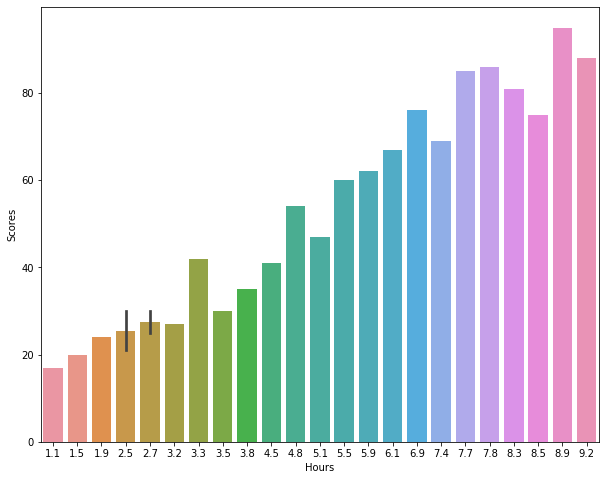

In [6]:
#bar graph representation of given data
plt.figure(figsize=(10,8))
sns.barplot(x=dataset['Hours'],y=dataset['Scores'])


In [7]:
#preprocessing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Linear Regression 

In [8]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
#prediction
lin_reg_pred = lin_reg.predict(X_test)

In [10]:
df1 = pd.DataFrame({'Actual': y_test.reshape(-1,), 'Predicted': lin_reg_pred.reshape(-1,)})  
df1 

,Actual,Predicted
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


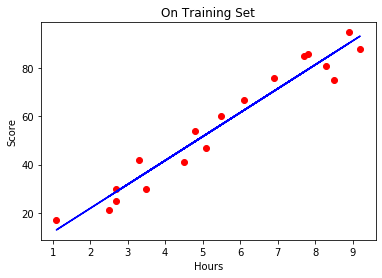

In [11]:
#Visualising the Training set results

plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, lin_reg.predict(X_train), color = 'blue')
plt.title('On Training Set')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.show()

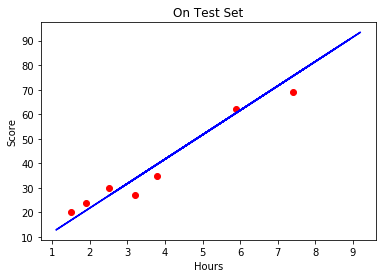

In [12]:
#Visualising the Test set results

plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, lin_reg.predict(X_train), color = 'blue')
plt.title('On Test Set')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.show()

In [43]:
print('predicted score if a student study for 9.25 hrs = {}'.format(lin_reg.predict([[9.25]])))

predicted score if a student study for 9.25 hrs = [[93.89272889]]


In [14]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,lin_reg_pred)) 

Mean Absolute Error: 4.130879918502486


In [22]:
#R-square value
from sklearn.metrics import r2_score
r2_score(y_test,lin_reg_pred)

0.9367661043365055

# DecisionTree regression

In [15]:
from sklearn.tree import DecisionTreeRegressor
dec_reg = DecisionTreeRegressor(random_state = 0)
dec_reg.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [16]:
#prediction
dec_reg_pred = dec_reg.predict(X_test)

In [17]:
df2 = pd.DataFrame({'Actual': y_test.reshape(-1,), 'Predicted': dec_reg_pred.reshape(-1,)})  
df2 

,Actual,Predicted
0,20,17.0
1,27,42.0
2,69,85.0
3,30,21.0
4,62,67.0
5,35,30.0
6,24,21.0


In [44]:
print('predicted score if a student study for 9.25 hrs = {}'.format(dec_reg.predict([[9.25]])))


predicted score if a student study for 9.25 hrs = [88.]


In [30]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,dec_red_pred)) 

Mean Absolute Error: 8.0


In [20]:
#R-squared value
r2_score(y_test,dec_red_pred)

0.7201066260472202

# Random forest regresssion

In [25]:
from sklearn.ensemble import RandomForestRegressor
ran_reg = RandomForestRegressor(n_estimators = 10, random_state = 0)
ran_reg.fit(X_train, y_train)

C:\Users\chandu\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [26]:
#prediction
ran_reg_pred = ran_reg.predict(X_test)

In [47]:
df3 = pd.DataFrame({'Actual': y_test.reshape(-1,), 'Predicted': ran_reg_pred.reshape(-1,)})  
df3 

,Actual,Predicted
0,20,18.200000
1,27,34.300000
2,69,85.300000
3,30,25.033333
4,62,61.800000
5,35,31.100000
6,24,18.600000


In [48]:
print('predicted score if a student study for 9.25 hrs = {}'.format(ran_reg.predict([[9.25]])))

predicted score if a student study for 9.25 hrs = [88.1]


In [49]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,ran_reg_pred)) 

Mean Absolute Error: 5.6952380952380945


In [50]:
r2_score(y_test,ran_reg_pred)

0.8261561027897663

# SVR model

For svr model we need to do feature scaling.In real-world dataset contains features that vary in magnitudes, units, and range. I would suggest performing normalization when the scale of a feature is irrelevant or misleading.

In [51]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train1 = sc_X.fit_transform(X_train)
y_train1 = sc_y.fit_transform(y_train)

In [52]:
from sklearn.svm import SVR
svr_reg = SVR(kernel = 'rbf')
svr_reg.fit(X_train1, y_train1)

C:\Users\chandu\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [53]:
#prediction
svr_reg_pred = sc_y.inverse_transform(svr_reg.predict(sc_X.transform(X_test)))

In [54]:
df4 = pd.DataFrame({'Actual': y_test.reshape(-1,), 'Predicted': svr_reg_pred.reshape(-1,)})  
df4

,Actual,Predicted
0,20,23.045773
1,27,31.192401
2,69,80.290900
3,30,26.245404
4,62,63.068588
5,35,36.578359
6,24,23.606623


In [55]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,svr_reg_pred))

Mean Absolute Error: 3.617713449568749


In [61]:
print('predicted score if a student study for 9.25 hrs = {}'.format(sc_y.inverse_transform(svr_reg.predict(sc_X.transform([[9.25]])))))

predicted score if a student study for 9.25 hrs = [84.93264486]


In [57]:
r2_score(y_test,svr_reg_pred)

0.9234859375446093